# Лабораторная работа №4. <br> Обучение с учителем. Задача классификации.

In [300]:
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from category_encoders.binary import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, classification_report, accuracy_score, recall_score
import sklearn.metrics as metric
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from math import sqrt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix
from sklearn import svm

# Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

In [301]:
data = pd.DataFrame([
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
])
data.columns=["weather","walk"]
data

,weather,walk
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [302]:
walk_probability = len(data.loc[(data['weather'] == 'дождь') & (data['walk'] == True)]) / len(data.loc[data['weather'] == 'дождь'])
print(walk_probability)

0.3333333333333333


# Задание 2

In [303]:
data = pd.read_csv("../data/weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Предобработка данных

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Удалю пропуски, так как их невозможно предсказать, а их неточное заполнение может повлиять на модель

In [305]:
data.dropna(inplace=True,ignore_index=True)

In [306]:
data.isna().sum().sort_values(ascending=False)

Date             0
WindSpeed3pm     0
RainToday        0
Temp3pm          0
Temp9am          0
Cloud3pm         0
Cloud9am         0
Pressure3pm      0
Pressure9am      0
Humidity3pm      0
Humidity9am      0
WindSpeed9am     0
Location         0
WindDir3pm       0
WindDir9am       0
WindGustSpeed    0
WindGustDir      0
Sunshine         0
Evaporation      0
Rainfall         0
MaxTemp          0
MinTemp          0
RainTomorrow     0
dtype: int64

In [307]:
data.duplicated().sum()

0

Наибольшее влияние на погоду оказывает время года, то есть месяц. Поэтому оставляю вместо даты только номер месяца

In [308]:
f = lambda x : str(x)[5:7]
data['Date'] = data['Date'].transform(f).astype(int)

Перевод категориальных данных в бинарные

В Rain today и Rain Tomorrow заменю No, Yes на 0,1

In [309]:
data['RainToday'] = data['RainToday'].replace("Yes", 1)
data['RainToday'] = data['RainToday'].replace("No", 0)
data['RainTomorrow'] = data['RainTomorrow'].replace("Yes", 1)
data['RainTomorrow'] = data['RainTomorrow'].replace("No", 0)

In [310]:
bn = BinaryEncoder()
data_category = bn.fit_transform(data.select_dtypes(include=['object'])).astype(int)
data_num = data.select_dtypes(exclude=['object'])
data = pd.concat([data_num, pd.DataFrame(data_category)], axis=1)
pd.set_option('display.max_columns', None)
data

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_0,Location_1,Location_2,Location_3,Location_4,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4
0,1,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,1,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1
3,1,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,1,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,6,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0,1,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,0
56416,6,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1
56417,6,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0,1,1,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0
56418,6,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1


In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  int32  
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustSpeed  56420 non-null  float64
 7   WindSpeed9am   56420 non-null  float64
 8   WindSpeed3pm   56420 non-null  float64
 9   Humidity9am    56420 non-null  float64
 10  Humidity3pm    56420 non-null  float64
 11  Pressure9am    56420 non-null  float64
 12  Pressure3pm    56420 non-null  float64
 13  Cloud9am       56420 non-null  float64
 14  Cloud3pm       56420 non-null  float64
 15  Temp9am        56420 non-null  float64
 16  Temp3pm        56420 non-null  float64
 17  RainToday      56420 non-null  int64  
 18  RainTo

In [312]:
print(len(data.loc[data['RainTomorrow'] == 1]))
print(len(data.loc[data['RainTomorrow'] == 0]))

12427
43993


Датасет несбалансирован примерно 1:4

In [313]:
#возьмём все данные класса 0
df_0 = data.loc[data['RainTomorrow']==0]
#обрежем его
df_0 = df_0.sample(len(data.loc[data['RainTomorrow']==0]))
#присоединим к данным класса 1 пореженный класс 0 и перемешаем
df = pd.concat([data.loc[data['RainTomorrow']==1], df_0])

In [314]:
df['RainTomorrow'].value_counts()

RainTomorrow
0    43993
1    12427
Name: count, dtype: int64

In [315]:
df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_0,Location_1,Location_2,Location_3,Location_4,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4
17,1,21.4,37.5,0.0,14.8,6.9,43.0,26.0,9.0,34.0,29.0,1013.1,1009.6,7.0,6.0,26.2,34.1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0
20,1,21.8,30.7,0.0,8.0,5.9,56.0,24.0,19.0,71.0,63.0,1008.6,1006.2,7.0,7.0,24.4,27.3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
21,1,20.3,36.0,18.0,8.2,10.5,94.0,13.0,7.0,89.0,50.0,1008.6,1006.7,7.0,4.0,24.7,33.4,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,1,1
32,2,23.6,40.4,0.6,11.8,12.2,54.0,9.0,11.0,42.0,17.0,1008.4,1005.0,1.0,2.0,29.9,38.7,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1
42,2,16.8,23.3,0.6,8.0,2.3,63.0,35.0,35.0,66.0,53.0,1013.8,1012.2,7.0,7.0,18.5,22.4,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44200,10,7.6,22.9,0.0,5.2,11.4,33.0,2.0,20.0,68.0,45.0,1015.8,1012.7,4.0,6.0,18.1,20.8,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,0,0,0
13468,9,10.8,18.0,0.0,10.0,0.5,69.0,9.0,26.0,89.0,67.0,1009.4,1003.4,7.0,6.0,12.8,16.9,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0
52053,12,18.8,38.4,0.0,10.0,11.8,46.0,26.0,19.0,27.0,15.0,1008.4,1004.5,1.0,5.0,30.8,36.6,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,0,0,1
1793,6,7.2,18.5,0.0,3.6,9.0,31.0,17.0,19.0,65.0,57.0,1026.3,1023.2,1.0,2.0,13.8,17.7,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,1,1,1,1


Целевой признак и предикторы

In [316]:
y = pd.DataFrame(df["RainTomorrow"])
x = pd.DataFrame(df.drop(["RainTomorrow"], axis=1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [317]:
x_test

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_0,Location_1,Location_2,Location_3,Location_4,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4
44141,8,8.4,18.7,2.2,2.4,8.0,35.0,4.0,20.0,69.0,48.0,1021.3,1020.3,1.0,7.0,15.0,17.5,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
10991,5,1.6,17.5,0.0,1.8,9.4,24.0,6.0,9.0,70.0,41.0,1030.0,1028.1,1.0,1.0,8.2,17.2,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0
17898,12,15.8,29.9,0.0,5.2,6.1,35.0,6.0,15.0,80.0,55.0,1012.3,1008.4,7.0,7.0,19.9,28.2,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0
21137,11,11.3,25.3,0.4,5.6,13.6,35.0,13.0,20.0,60.0,47.0,1026.4,1022.5,1.0,1.0,14.8,22.5,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0
39030,12,10.4,23.6,0.0,3.8,10.9,48.0,19.0,22.0,69.0,43.0,1011.5,1011.9,7.0,3.0,17.2,21.7,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17631,3,17.3,28.0,0.4,4.0,5.7,102.0,6.0,26.0,75.0,97.0,1009.8,1010.3,7.0,7.0,21.3,16.7,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1
39319,10,3.3,17.0,0.0,3.2,10.8,41.0,22.0,28.0,59.0,52.0,1036.0,1035.9,3.0,3.0,11.0,15.7,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0
56303,2,28.3,32.1,0.0,7.6,1.2,28.0,7.0,13.0,79.0,68.0,1011.4,1008.5,7.0,6.0,29.4,30.6,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1
26700,7,7.6,15.1,8.0,3.4,6.5,39.0,9.0,17.0,79.0,52.0,1020.9,1020.2,2.0,6.0,9.6,13.8,1,0,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0,0,0,0


Масштабирую тестовую и тенировочную выборки

In [318]:
scaler=MinMaxScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train))
x_test=pd.DataFrame(scaler.transform(x_test))

y_train = y_train.values.ravel()

## Классификация

### k-NN

Подберу гиперпараметр

In [ ]:
param_grid = {
    "n_neighbors": range(20, 100),
    "p": [1, 2],
}

gridseach = GridSearchCV(KNeighborsClassifier(weights="distance", metric='minkowski'), param_grid=param_grid, scoring="f1")
gridseach.fit(x_train, y_train.values.ravel())
gridseach.best_params_

{'n_neighbors': 80, 'p': 1}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=80, metric='minkowski', p=1, weights="distance")
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_knn))
metric.roc_auc_score(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      3765
           1       0.76      0.81      0.78      3692

    accuracy                           0.78      7457
   macro avg       0.78      0.78      0.78      7457
weighted avg       0.78      0.78      0.78      7457



0.7767361395875508

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[2815,  950],
       [ 717, 2975]], dtype=int64)

Модель дала 5790 правильных ответов и 1667 ложных

### Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(x_train, y_train)

y_pred_nb = NB.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_nb))
metric.roc_auc_score(y_test, y_pred_nb)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      3765
           1       0.77      0.76      0.77      3692

    accuracy                           0.77      7457
   macro avg       0.77      0.77      0.77      7457
weighted avg       0.77      0.77      0.77      7457



0.7695142147193098

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
cm

array([[2935,  830],
       [ 888, 2804]], dtype=int64)

Модель дала 5739 правильных ответов и 1718 ложных

### Logistic Regression

In [ ]:
gridsearch = GridSearchCV(LogisticRegression(max_iter=1000), {"C": np.arange(0.1, 1.1, 0.1)}, scoring="f1")
gridsearch.fit(X_train, y_train).best_params_

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

# Оценка модели
print(classification_report(y_test, predictions))
metric.roc_auc_score(y_test,predictions )

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3765
           1       0.80      0.79      0.79      3692

    accuracy                           0.80      7457
   macro avg       0.80      0.80      0.80      7457
weighted avg       0.80      0.80      0.80      7457



0.795829646383768

In [ ]:
cm_lr = confusion_matrix(y_test, predictions)
cm_lr

array([[3022,  743],
       [ 779, 2913]], dtype=int64)

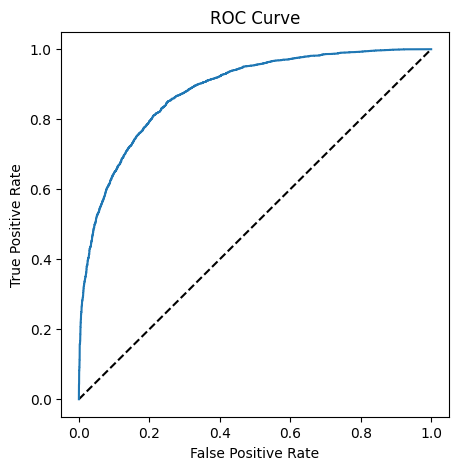

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(x_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(5,5))
# Строим диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### SVM

In [ ]:
model_lin=LinearSVC()
model_lin.fit(x_train, y_train)

LinearSVC()

In [ ]:
model_sgd=SGDClassifier()
model_sgd.fit(x_train, y_train)

SGDClassifier()

In [ ]:
y_test['target_lin'] = model_lin.predict(x_test)
y_test['target_sgd'] = model_sgd.predict(x_test)

In [ ]:
print (f1_score(y_test['target_lin'],y_test['RainTomorrow'], average='weighted'))
print (f1_score(y_test['target_sgd'],y_test['RainTomorrow'], average='weighted'))

0.8641447650773828
0.8681891809287887


In [ ]:
print ('SVM (линейный: )\n', confusion_matrix(y_test['target_lin'],y_test['RainTomorrow']))
print ('SVM (градиент: )\n', confusion_matrix(y_test['target_lin'],y_test['RainTomorrow']))

SVM (линейный: )
 [[12518  1794]
 [  673  1941]]
SVM (градиент: )
 [[12518  1794]
 [  673  1941]]


In [ ]:
clf = svm.SVC(kernel='poly')
clf.fit(x_train, y_train)

y_pred_svm = clf.predict(x_test)
print(classification_report(y_test['RainTomorrow'], y_pred_svm))
print ('SVM\n', confusion_matrix(y_test['RainTomorrow'],y_pred_svm))
metric.roc_auc_score(y_test['RainTomorrow'], y_pred_svm)

              precision    recall  f1-score   support

           0       0.88      0.96      0.91     13191
           1       0.77      0.53      0.63      3735

    accuracy                           0.86     16926
   macro avg       0.82      0.74      0.77     16926
weighted avg       0.85      0.86      0.85     16926

SVM
 [[12601   590]
 [ 1766  1969]]


0.7412239512214578

## Итоговая модель

In [ ]:
y_test=y_test['RainTomorrow']

In [ ]:
classifiers = {
    'KNN classifier': KNeighborsClassifier(n_neighbors=80, p=1, weights="distance"),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(y_test,y_pred))

Accuracy (train) for KNN classifier: 82.5% 
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     13191
           1       0.80      0.28      0.41      3735

    accuracy                           0.83     16926
   macro avg       0.82      0.63      0.65     16926
weighted avg       0.82      0.83      0.79     16926

Accuracy (train) for Naive Bayes: 79.8% 
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     13191
           1       0.53      0.68      0.60      3735

    accuracy                           0.80     16926
   macro avg       0.72      0.76      0.73     16926
weighted avg       0.82      0.80      0.81     16926

Accuracy (train) for Logistic Regression: 85.5% 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     13191
           1       0.74      0.53      0.62      3735

    accuracy                           0.85     

# Задание 3. <br> Accuracy, Precision, Recall, F-мера, k-NN самостоятельно

Метрики буду просчитывать для итоговой модели

In [ ]:
def accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+fn+tn+fp)
print(accuracy_score(y_test, y_pred), f'My: {accuracy(y_test, y_pred)}')

0.8548387096774194 My: 0.8548387096774194


In [ ]:
def precision(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)
print(precision_score(y_test, y_pred), f'My: {precision(y_test, y_pred)}')

0.7352724594992637 My: 0.7352724594992637


In [ ]:
def recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)
print(recall_score(y_test, y_pred), f'My: {recall(y_test, y_pred)}')

0.5346720214190094 My: 0.5346720214190094


Высокий precision и низкий recall говорит о том, что классификатор нашёл не все объекты положительного класса, но большую долю положительных объектов он определелил верно,как положительные.

![](https://habrastorage.org/getpro/habr/upload_files/296/a01/f88/296a01f88803b979f195a4c5fdd7e234.png)

In [ ]:
def f1(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return 2*(tp/(tp+fp))*(tp/(tp+fn))/(tp/(tp+fp)+tp/(tp+fn))
print(f1_score(y_test, y_pred), f'My: {f1(y_test, y_pred)}')

0.6191288172376377 My: 0.6191288172376377


In [323]:
import statistics

class my_kNN:
    def __init__(self, x_train, y_train, k_neighbors):
        self.x_train=x_train.to_numpy()
        self.y_train=y_train.to_numpy()
        self.k_neighbors = k_neighbors

    def euclidean_distance(self, df1, df2):
        distance = 0
        for i in range (0, len(df1)):
            distance += (df1[i] - df2[i]) ** 2
        return np.sqrt(distance)

    def get_neighbors(self, koor_tochki):
        distances=[]
        for i in range (len(self.x_train)):
            metka=y_train[i]
            dist=self.euclidean_distance(self.x_train[i], koor_tochki)
            distances.append((metka, dist))
        distances.sort(key=lambda elem: elem[1])
        neighbors = [distances[i][0] for i in range (self.k_neighbors)]
        return statistics.mode(neighbors)
        
    def predic(self, x_test):
        metki = []
        x_test = x_test.to_numpy()
        for index, koor_tochki in enumerate(x_test):
            metki.append(self.get_neighbors(koor_tochki))
        return metki
    


In [324]:
knn = my_kNN(x_train.iloc[:500], pd.DataFrame(y_train).iloc[:500], 9)
y_pred = knn.predic(x_test.iloc[:200])
print(classification_report(y_test.iloc[:200], y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       166
           1       0.64      0.26      0.37        34

    accuracy                           0.85       200
   macro avg       0.75      0.62      0.64       200
weighted avg       0.83      0.85      0.82       200

